In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from collections import defaultdict
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
Dataset=pd.read_csv('customer_new1.csv')

In [3]:
Dataset.describe()

,customer_id,age,income,No of transactions,home_loc_latiutde,home_loc_longitude,work_loc_longitude,work_loc_latitude,cluster
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1500.500000,44.699000,78749.222000,95.595000,13.050698,80.199749,80.192816,13.046146,1.078000
std,288.819436,9.857767,28762.744522,9.668736,0.086235,0.116639,0.116360,0.087064,0.747311
min,1001.000000,19.000000,5305.000000,66.000000,12.900070,80.000553,80.000730,12.900159,0.000000
25%,1250.750000,37.000000,59772.750000,89.000000,12.977151,80.098320,80.090104,12.968996,1.000000
50%,1500.500000,45.000000,77076.500000,95.000000,13.052660,80.195215,80.189135,13.042858,1.000000
75%,1750.250000,52.000000,97332.250000,102.000000,13.125356,80.300457,80.291287,13.123338,2.000000
max,2000.000000,74.000000,148526.000000,128.000000,13.199655,80.399551,80.399355,13.199838,2.000000


In [4]:
m=1000

In [5]:
x1=Dataset.iloc[:,2:3].values
x2=Dataset.iloc[:,3:4].values
x3=Dataset.iloc[:,4:5].values

In [6]:
X=np.c_[x1,x2,x3]

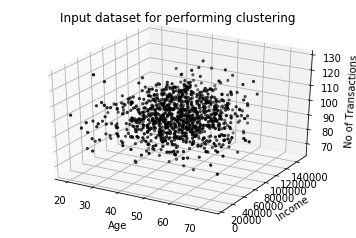

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1,x2,x3,marker='.',c='black')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('No of Transactions')
ax.set_title('Input dataset for performing clustering')
plt.show()

Steps involved in K Means Clustering
1. Initialize two examples of the training data set as Centroids
2. Loop over the num of iterations to perform the clustering.
   2.a. For each training example compute the euclidian distance from the centroid and assign the cluster
   based on the minimal distance.
   2.b Adjust the centroid of each cluster by taking the average of all the training examples which belonged 
   to that cluster on the basis of the computations performed in step 2.a

In [9]:
#Step 1.initialize number of clusters
K=3
Centroids=np.array([]).reshape(3,0)

for i in range(K):
    rand=rd.randint(0,m)
    Centroids=np.c_[Centroids,X[rand]]

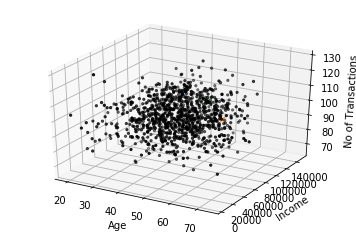

In [11]:
#Plot the data set with initial centroids
ax1 = plt.axes(projection='3d')
ax1.scatter(x1,x2,x3,marker='.',c='black')
for i in range(K):
    ax1.scatter(Centroids[:,i][0],Centroids[:,i][1],Centroids[:,i][2],marker='x')
ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_zlabel('No of Transactions')
plt.show()

In [12]:
#step2
num_iter=100
Output=defaultdict()
for n in range(num_iter):
    #step 2.a
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    C=np.argmin(EuclidianDistance,axis=1)+1
    #step 2.b
    Y=defaultdict()
    for k in range(K):
        Y[k+1]=np.array([]).reshape(3,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
        
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=1)
        
    Output=Y

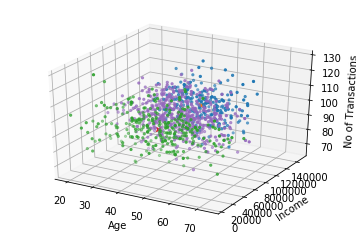

In [13]:
ax2= plt.axes(projection='3d')
for k in range(K):
    ax2.scatter(Output[k+1][0,:],Output[k+1][1,:],Output[k+1][2,:],marker='.')
    ax2.scatter(Centroids[:,k][0],Centroids[:,k][1],Centroids[:,k][2],marker='x')
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('No of Transactions')
plt.show()

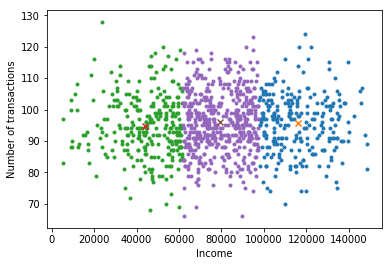

In [14]:
for k in range(K):
    plt.scatter(Output[k+1][1,:],Output[k+1][2,:],marker='.')
    plt.scatter(Centroids[:,k][1],Centroids[:,k][2],marker='x')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.show()

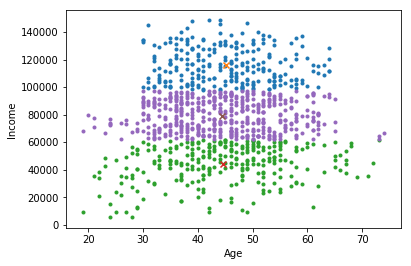

In [15]:
for k in range(K):
    plt.scatter(Output[k+1][0,:],Output[k+1][1,:],marker='.')
    plt.scatter(Centroids[:,k][0],Centroids[:,k][1],marker='x')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

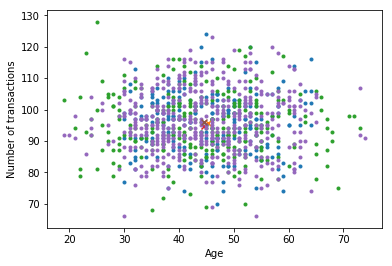

In [16]:
for k in range(K):
    plt.scatter(Output[k+1][0,:],Output[k+1][2,:],marker='.')
    plt.scatter(Centroids[:,k][0],Centroids[:,k][2],marker='x')
plt.xlabel('Age')
plt.ylabel('Number of transactions')
plt.show()